In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [96]:
nfl_teams=["ARI", "ATL", "BAL", "BUF", "CAR", "CHI", "CIN", "CLE", "DAL", "DEN", 
           "DET", "GB", "HOU", "IND", "JAX", "KC", "LV", "LAC", "LAR", "MIA", 
           "MIN", "NE", "NO", "NYG", "NYJ", "PHI", "PIT", "SF", "SEA", "TB", 
           "TEN", "WAS"]

ep_sets = []
down = 1
distance = 10

unfinished = []

for team in nfl_teams:
    try:
        ep_set_df = pd.read_csv('final_team/team-data/biased_eps_'+team+'/eps.csv')
        ep_set = ep_set_df[ep_set_df['Down'] == down]
        ep_set = ep_set[((ep_set['Distance'] == distance) & (ep_set['Yardline'] >= distance)) | ((ep_set['Yardline'] < distance) 
                                                                                                    & (ep_set['Distance'] == ep_set['Yardline']))]
        ep_sets.append((team, ep_set))
    except:
        unfinished.append(team)
        pass

nfl = pd.read_csv('final_team/nfl_eps/eps.csv')
ep_set_nfl = nfl[nfl['Down'] == down]
ep_set_nfl = ep_set_nfl[((ep_set_nfl['Distance'] == distance) & (ep_set_nfl['Yardline'] >= distance)) | ((ep_set_nfl['Yardline'] < distance) 
                                                                                                   & (ep_set_nfl['Distance'] == ep_set_nfl['Yardline']))]
#ep_sets.append(("NFL", ep_set_nfl))

print(unfinished)

[]


In [97]:
# Sort ep_sets by the sum of EP in ascending order
sorted_ep_sets = sorted(ep_sets, key=lambda ep_set: np.sum(ep_set[1]['Max_EP']), reverse=True)

snamelist=[]

# Print names in order
for name, _ in sorted_ep_sets:
    snamelist.append(name)

print(snamelist)

['TB', 'NO', 'WAS', 'BUF', 'PIT', 'SF', 'LV', 'NYG', 'GB', 'ARI', 'KC', 'CIN', 'TEN', 'NE', 'NYJ', 'SEA', 'HOU', 'DET', 'DEN', 'IND', 'MIA', 'BAL', 'JAX', 'CLE', 'PHI', 'CAR', 'DAL', 'ATL', 'LAR', 'CHI', 'LAC', 'MIN']


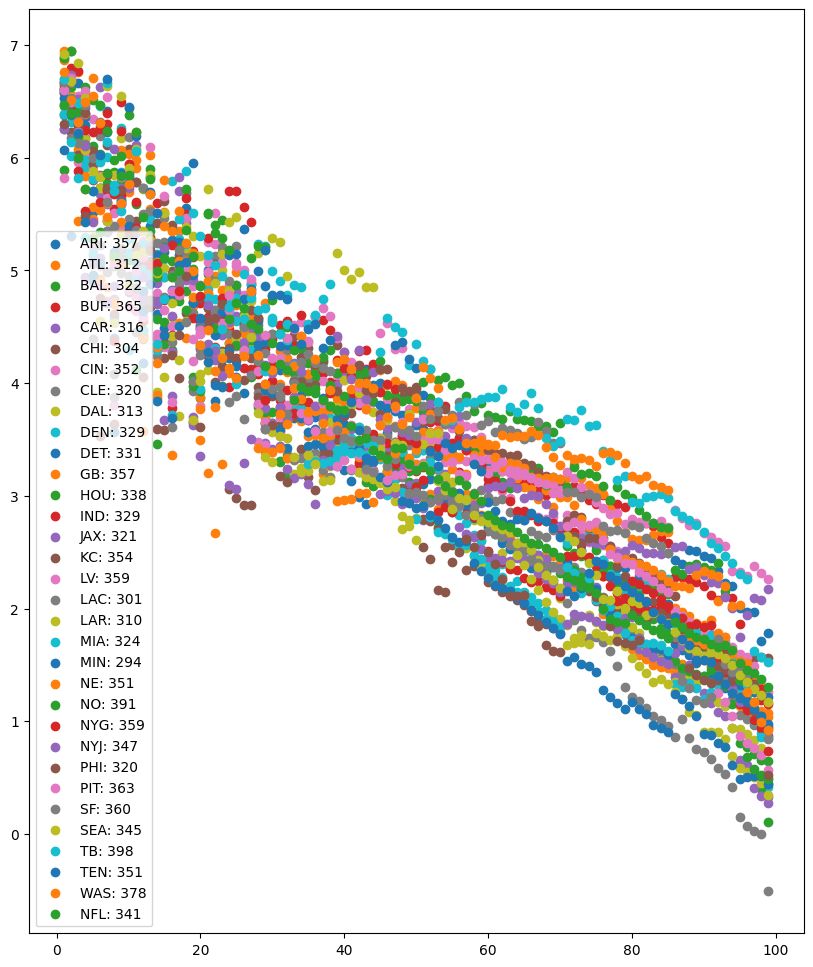

In [98]:
plt.figure(figsize=(10, 12))

for ep_set in ep_sets:
    name, set = ep_set
    plt.scatter(set['Yardline'], set['Max_EP'], label = name+": "+str(int(np.sum(set['Max_EP']))))

plt.scatter(ep_set_nfl['Yardline'], ep_set_nfl['Max_EP'], label = "NFL: "+str(int(np.sum(ep_set_nfl['Max_EP']))))
plt.legend()

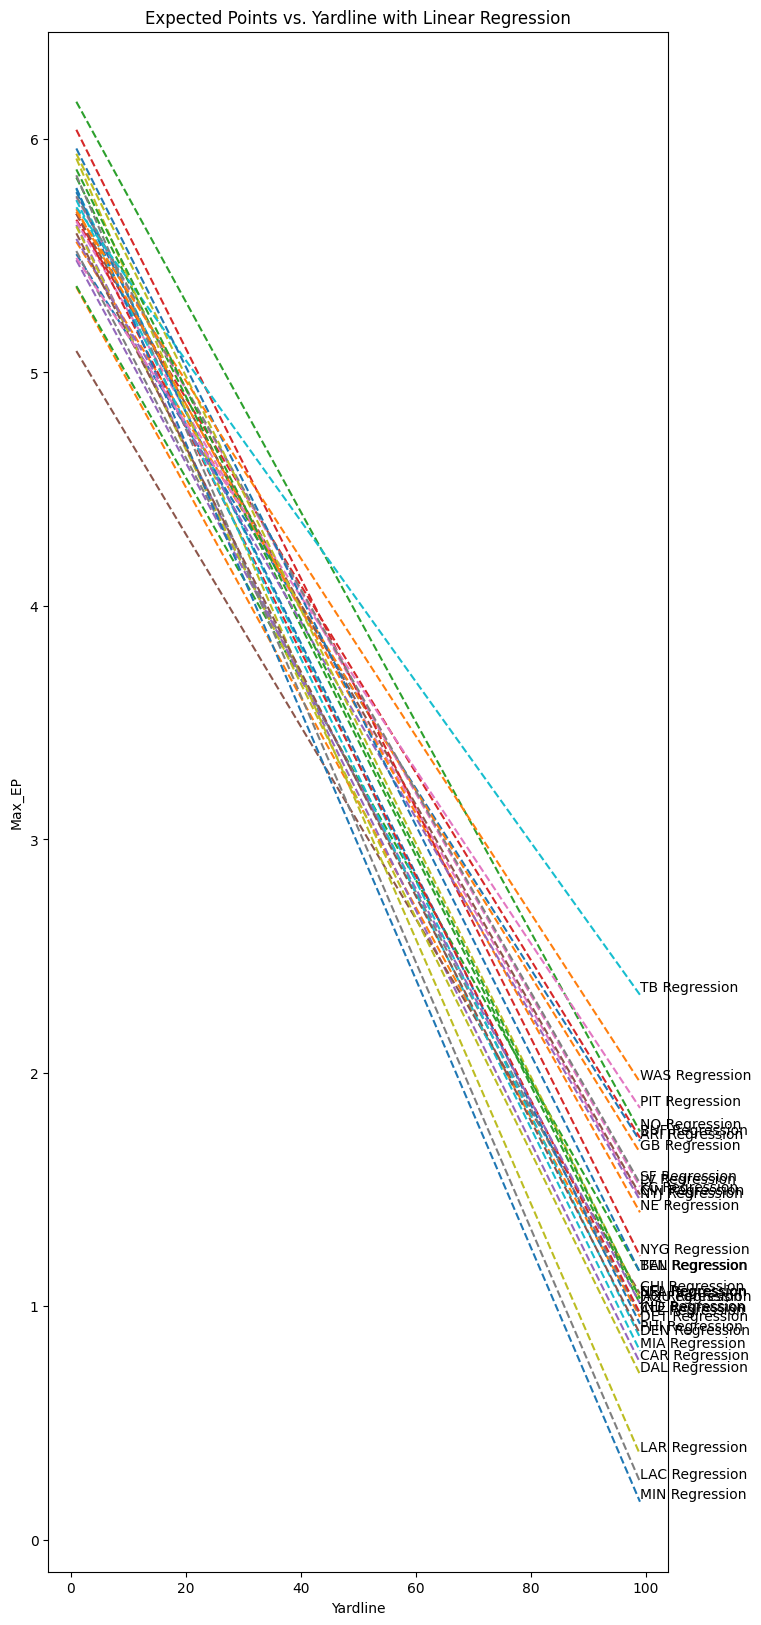

In [99]:

plt.figure(figsize=(8, 20))

# Plot scatter points and regression lines
for ep_set in ep_sets:
    name, set = ep_set
    
    # Compute linear regression line
    coeffs = np.polyfit(set['Yardline'], set['Max_EP'], 1)
    x_vals = np.linspace(min(set['Yardline']), max(set['Yardline']), 100)
    y_vals = np.polyval(coeffs, x_vals)
    
    # Plot regression line
    plt.plot(x_vals, y_vals, linestyle="--", label=f"{name} Regression")

    # Label the line at its rightmost point
    plt.text(x_vals[-1], y_vals[-1], f"{name} Regression", verticalalignment='bottom', fontsize=10)

# Compute and plot NFL regression line
nfl_coeffs = np.polyfit(ep_set_nfl['Yardline'], ep_set_nfl['Max_EP'], 1)
x_vals_nfl = np.linspace(min(ep_set_nfl['Yardline']), max(ep_set_nfl['Yardline']), 100)
y_vals_nfl = np.polyval(nfl_coeffs, x_vals_nfl)

# Plot NFL regression line
plt.plot(x_vals_nfl, y_vals_nfl, linestyle="--", label="NFL Regression")

# Label the NFL line at its rightmost point
plt.text(x_vals_nfl[-1], y_vals_nfl[-1], "NFL Regression", verticalalignment='bottom', fontsize=10)

plt.xlabel("Yardline")
plt.ylabel("Max_EP")
plt.title("Expected Points vs. Yardline with Linear Regression")
plt.show()

In [100]:
# Create a list of (name, total_EP) tuples
ep_sums = [(name, np.sum(df['Max_EP'])) for name, df in ep_sets]

# Sort by total_EP
ep_sums_sorted = sorted(ep_sums, key=lambda x: x[1], reverse=True)  # reverse=True for descending

# Print results
for name, total in ep_sums_sorted:
    print(f"{name}: {total:.2f}")


TB: 398.06
NO: 391.47
WAS: 378.63
BUF: 365.14
PIT: 363.34
SF: 360.44
LV: 359.51
NYG: 359.14
GB: 357.31
ARI: 357.13
KC: 354.33
CIN: 352.22
TEN: 351.71
NE: 351.56
NYJ: 347.86
SEA: 345.08
HOU: 338.91
DET: 331.52
DEN: 329.30
IND: 329.24
MIA: 324.11
BAL: 322.57
JAX: 321.43
CLE: 320.94
PHI: 320.70
CAR: 316.33
DAL: 313.54
ATL: 312.85
LAR: 310.97
CHI: 304.23
LAC: 301.63
MIN: 294.69


In [101]:
freq_df = pd.read_csv("frequency.csv")

In [102]:
# Rename for consistency
freq_df.rename(columns={'down': 'Down', 'distance': 'Distance', 'yardline': 'Yardline'}, inplace=True)

# Apply the same filtering logic to match df in ep_sets:
# - down == 1
# - (distance == 10 and yardline >= 10) OR (distance == yardline and yardline < 10)
freq_df_filtered = freq_df[
    (freq_df['Down'] == 1) &
    (
        ((freq_df['Distance'] == 10) & (freq_df['Yardline'] >= 10)) |
        ((freq_df['Distance'] == freq_df['Yardline']) & (freq_df['Yardline'] < 10))
    )
]

tot = np.sum(freq_df_filtered['frequency'])

# Now compute weighted sums
ep_sums = []
for name, df in ep_sets:
    # Merge EP and frequency data on Down, Distance, Yardline
    merged = pd.merge(df, freq_df_filtered, on=['Down', 'Distance', 'Yardline'], how='inner')

    # Compute weighted EP
    merged['weighted_ep'] = merged['Max_EP'] * merged['frequency']
    total_weighted_ep = merged['weighted_ep'].sum()

    ep_sums.append((name, total_weighted_ep/tot))

# Sort and print
ep_sums_sorted = sorted(ep_sums, key=lambda x: x[1], reverse=True)
for name, total in ep_sums_sorted:
    print(f"{name}: {total:.2f}")

TB: 4.03
NO: 3.94
WAS: 3.81
SF: 3.65
LV: 3.64
BUF: 3.62
GB: 3.60
KC: 3.55
PIT: 3.52
NYG: 3.50
CIN: 3.49
NE: 3.49
ARI: 3.48
TEN: 3.47
HOU: 3.37
SEA: 3.35
NYJ: 3.32
DEN: 3.23
DET: 3.22
IND: 3.21
CLE: 3.18
BAL: 3.18
JAX: 3.17
CAR: 3.13
PHI: 3.08
MIA: 3.08
ATL: 3.06
DAL: 3.04
LAR: 3.00
LAC: 2.97
CHI: 2.90
MIN: 2.80
